In [1]:
from exact_diag import form_basis, periodic_ham, antiperiodic_ham
from exact_diag import casimir_dict, find_nk, find_skz, quantum_operator
from quspin.basis import spinless_fermion_basis_1d
from quspin.operators import quantum_operator
import matplotlib.pyplot as plt
import numpy as np
import tqdm

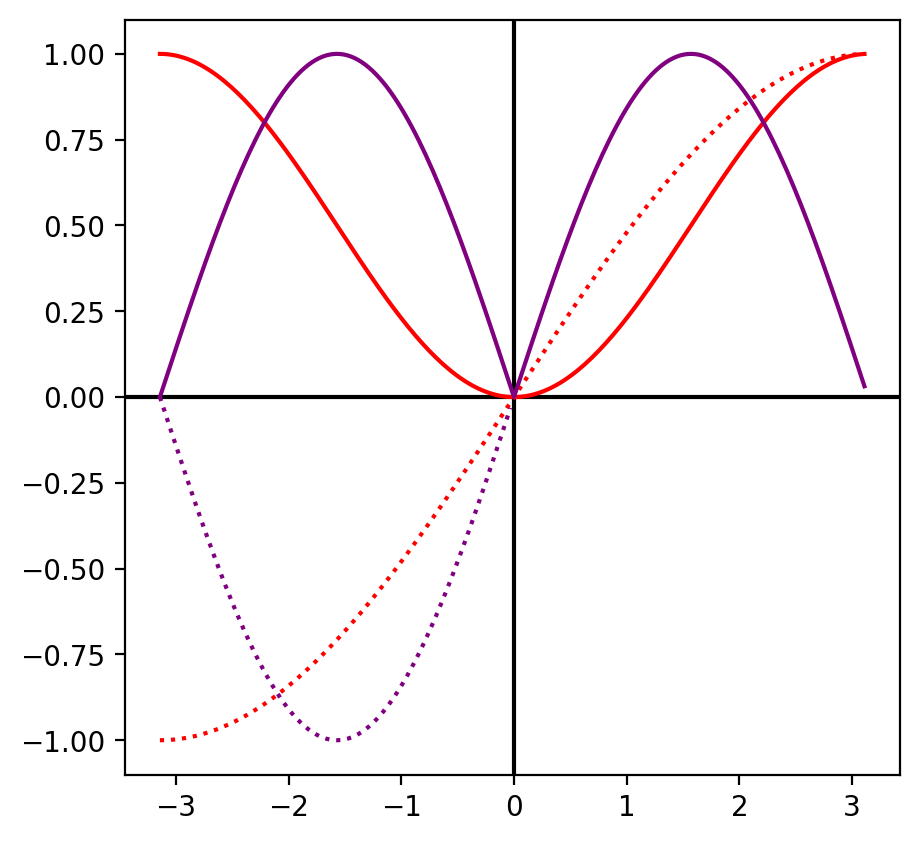

In [30]:
l_fig = 100
k_fig = np.pi*np.arange(-2*l_fig, 2*l_fig, 2)/(2*l_fig)

t1 = 1
t2 = 0
plt.figure(figsize=(5,5), dpi=200)
plt.axvline(0, color='black')
plt.axhline(0, color='black')
# rgk_eps = 2-2*t1 * np.cos(k_fig) - 2*t2 * np.cos(2*k_fig)
rgk_eta = np.sin(0.5*k_fig)*np.sqrt(t1-4*t2*(np.cos(.5*k_fig))**2)
rgk_eps = rgk_eta**2
rgk_eta_2 = 4*np.sin(0.5*k_fig)**2*(t1+4*t2*(np.cos(.5*k_fig))**2)
my_eps = np.abs(np.sin(k_fig))
# plt.plot(k_fig, np.abs(k_fig), color='blue')
# plt.plot(k_fig, k_fig, color='blue', ls=':')
plt.plot(k_fig, rgk_eps, color='red')
plt.plot(k_fig, rgk_eta, color='red', ls=':')
plt.plot(k_fig, my_eps, color='purple')
plt.plot(k_fig[:l_fig], -1*my_eps[:l_fig], ls=':', color='purple')

In [3]:
l = 4
k_peri = np.pi*np.arange(-2*l, 2*l, 2)/(2*l)
k_anti = np.pi*np.arange(-2*l+1, 2*l, 2)/(2*l)
eta_peri = np.abs(np.sin(k_peri)**2)
eta_anti = np.abs(np.sin(k_anti)**2)

Gc = 2./np.sum(eta_anti)
print('Gc')
print(Gc)

G1 = 0.7*Gc
# G2 = G1/(2*G1/Gc-1)
G2 = 2*Gc
print('Gs/Gc')
print(G1/Gc)
print(G2/Gc)

cds = [casimir_dict(l, i, 1) for i in range(l)]

Gc
0.5
Gs/Gc
0.7
2.0


# Below half-filling

In [4]:
Nup = l//2
# Ndwn = l//2
Ndwn = Ndwn = Nup
basis = form_basis(2*l, Nup, Ndwn)
    
hp_below = periodic_ham(l, G1, basis)
ha_below = antiperiodic_ham(l, G1, basis)

hp_above = periodic_ham(l, G2, basis)
ha_above = antiperiodic_ham(l, G2, basis)

[-1.20403008 -0.84068502 -0.81670324 -0.81670324 -0.81670324 -0.81670324
 -0.80377546 -0.70712051 -0.70712051 -0.70712051]
[-1.85381746 -1.845323   -1.52181298 -1.52181298 -1.52181298 -1.47935039
 -1.47226973 -1.40089692 -1.21176842 -1.21176842]


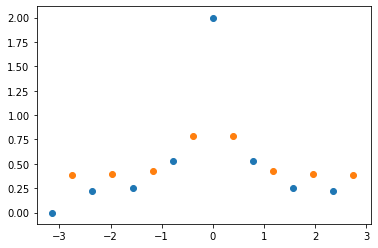

In [5]:
ep, vp = hp_below.eigh()
ea, va = ha_below.eigh()
print(ep[:10])
print(ea[:10])

eps_degen = ep[np.abs(ep - ep[0]) < 10**-10]
for i in range(len(eps_degen)):
    n_peri = find_nk(l, vp[:,i], basis)
    n_anti = find_nk(l, va[:,0], basis)
    plt.scatter(k_peri, n_peri)
    plt.scatter(k_anti, n_anti)
    plt.show()


[-7.41255748 -7.32668603 -5.94705626 -5.71572336 -5.71572336 -5.71572336
 -5.71572336 -5.58892608 -5.40764613 -5.40764613]
[-10.70545902 -10.58137382  -8.38586524  -8.0866745   -8.0866745
  -8.0866745   -8.03337872  -8.03337872  -8.03337872  -8.03337872]


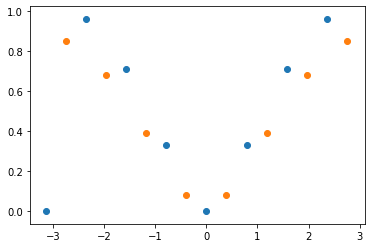

In [6]:
ep, vp = hp_above.eigh()
ea, va = ha_above.eigh()
print(ep[:10])
print(ea[:10])

eps_degen = ep[np.abs(ep - ep[0]) < 10**-10]
for i in range(len(eps_degen)):
    n_peri = find_nk(l, vp[:,i], basis)
    n_anti = find_nk(l, va[:,0], basis)
    plt.scatter(k_peri, n_peri)
    plt.scatter(k_anti, n_anti)
    plt.show()

In [7]:
Gs = np.linspace(0, 4, 50)*Gc
eps_05 = np.zeros(len(Gs))
eas_05 = np.zeros(len(Gs))

for i, G in enumerate(tqdm.tqdm(Gs)):
    hp = periodic_ham(l, G, basis)
    ha = antiperiodic_ham(l, G, basis)
    ep, _ = hp.eigh()#k=1, which='SA')
    eps_05[i] = ep[0]
    ea, _ = ha.eigh()#k=1, which='SA')
    eas_05[i] = ea[0]
    
    

100%|██████████| 50/50 [01:45<00:00,  2.11s/it]


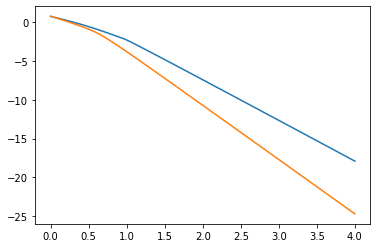

In [8]:
plt.plot(Gs/Gc, eps_05)
plt.plot(Gs/Gc, eas_05)

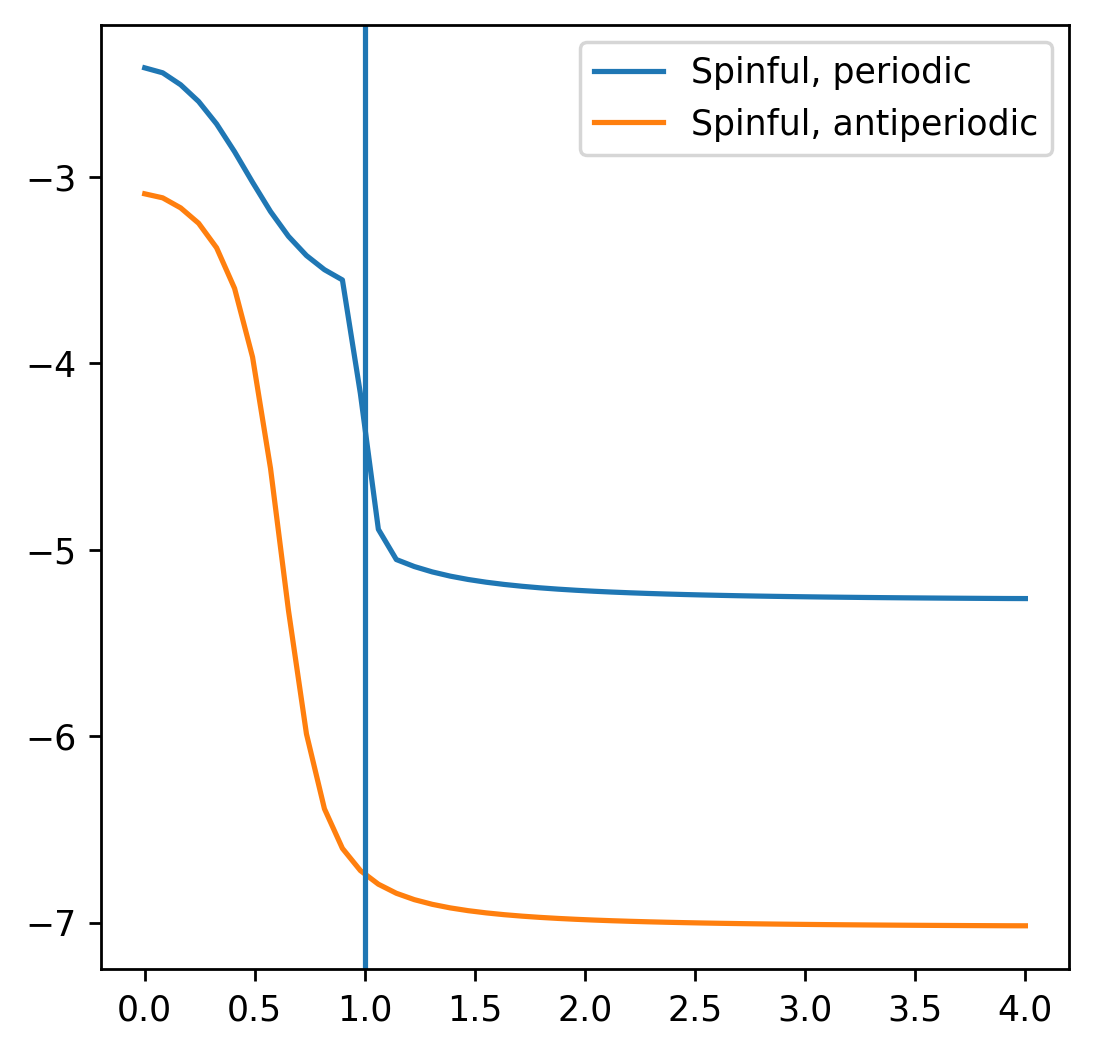

In [9]:
plt.figure(figsize=(5,5), dpi=250)
plt.plot(Gs/Gc, np.gradient(eps_05, Gs/Gc), label='Spinful, periodic')
plt.plot(Gs/Gc, np.gradient(eas_05, Gs/Gc), label='Spinful, antiperiodic')
plt.axvline(1)
plt.legend()

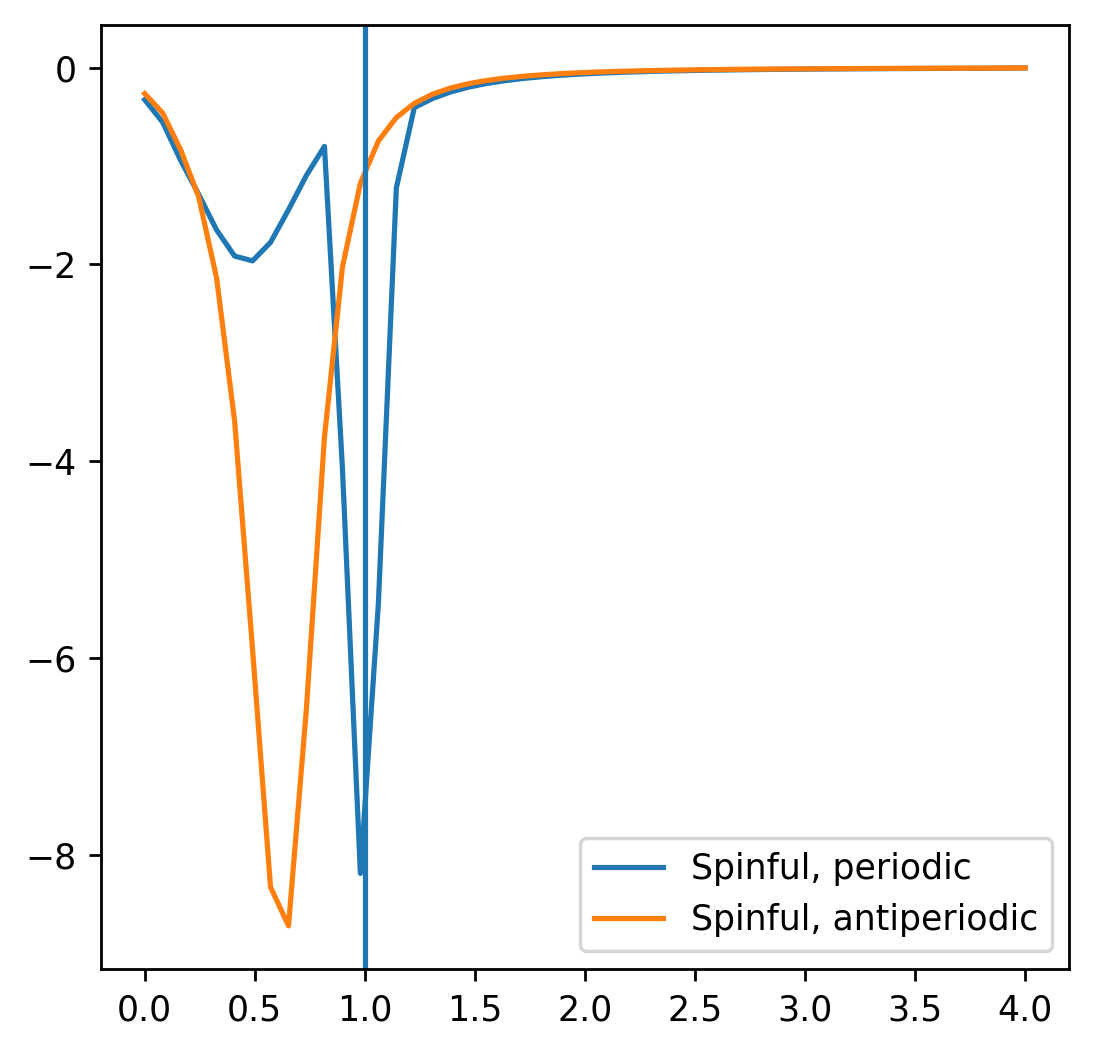

In [10]:
plt.figure(figsize=(5,5), dpi=250)
plt.plot(Gs/Gc, np.gradient(np.gradient(eps_05, Gs/Gc), Gs/Gc), label='Spinful, periodic')
plt.plot(Gs/Gc, np.gradient(np.gradient(eas_05, Gs/Gc), Gs/Gc), label='Spinful, antiperiodic')
plt.axvline(1)
# plt.axvline(np.sum(np.abs(k_peri))/np.sum(np.abs(k_peri[1:])))
plt.legend()

## Above 1/2 filling

In [11]:
Nup = 3*l//2
Ndwn = 3*l//2
basis = form_basis(2*l, Nup, Ndwn)
    
hp_below = periodic_ham(l, G1, basis)
ha_below = antiperiodic_ham(l, G1, basis)

hp_above = periodic_ham(l, G2, basis)
ha_above = antiperiodic_ham(l, G2, basis)

[0.38515794 0.8028668  0.98523016 0.98523016 0.98523016 0.98523016
 1.16464187 1.17997569 1.17997569 1.17997569]
[-1.32190292 -1.31746702 -0.87304094 -0.87154136 -0.87154136 -0.87154136
 -0.81810662 -0.80290441 -0.61232474 -0.61232474]


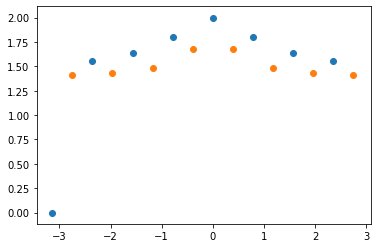

In [12]:
ep, vp = hp_below.eigh()
ea, va = ha_below.eigh()
print(ep[:10])
print(ea[:10])

eps_degen = ep[np.abs(ep - ep[0]) < 10**-10]
for i in range(len(eps_degen)):
    n_peri = find_nk(l, vp[:,i], basis)
    n_anti = find_nk(l, va[:,0], basis)
    plt.scatter(k_peri, n_peri)
    plt.scatter(k_anti, n_anti)
    plt.show()

[-12.6647844  -11.43304843 -11.43304843 -11.43304843 -11.43304843
 -11.40907823 -10.43304843 -10.43304843 -10.43304843 -10.43304843]
[-19.43383053 -18.59261411 -17.97028159 -17.97028159 -17.97028159
 -17.85427802 -17.66049837 -17.62292735 -17.62292735 -17.62292735]


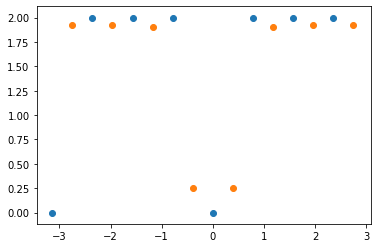

In [13]:
ep, vp = hp_above.eigh()
ea, va = ha_above.eigh()
print(ep[:10])
print(ea[:10])

eps_degen = ep[np.abs(ep - ep[0]) < 10**-10]
for i in range(len(eps_degen)):
    n_peri = find_nk(l, vp[:,i], basis)
    n_anti = find_nk(l, va[:,0], basis)
    plt.scatter(k_peri, n_peri)
    plt.scatter(k_anti, n_anti)
    plt.show()

In [14]:
Gs = np.linspace(0, 4, 50)*Gc
eps_15 = np.zeros(len(Gs))
eas_15 = np.zeros(len(Gs))
for i, G in enumerate(tqdm.tqdm(Gs)):
    hp = periodic_ham(l, G, basis)
    ha = antiperiodic_ham(l, G, basis)
    ep, _ = hp.eigsh(k=1, which='SA')
    eps_15[i] = ep[0]
    ea, _ = ha.eigsh(k=1, which='SA')
    eas_15[i] = ea[0]

100%|██████████| 50/50 [00:40<00:00,  1.25it/s]


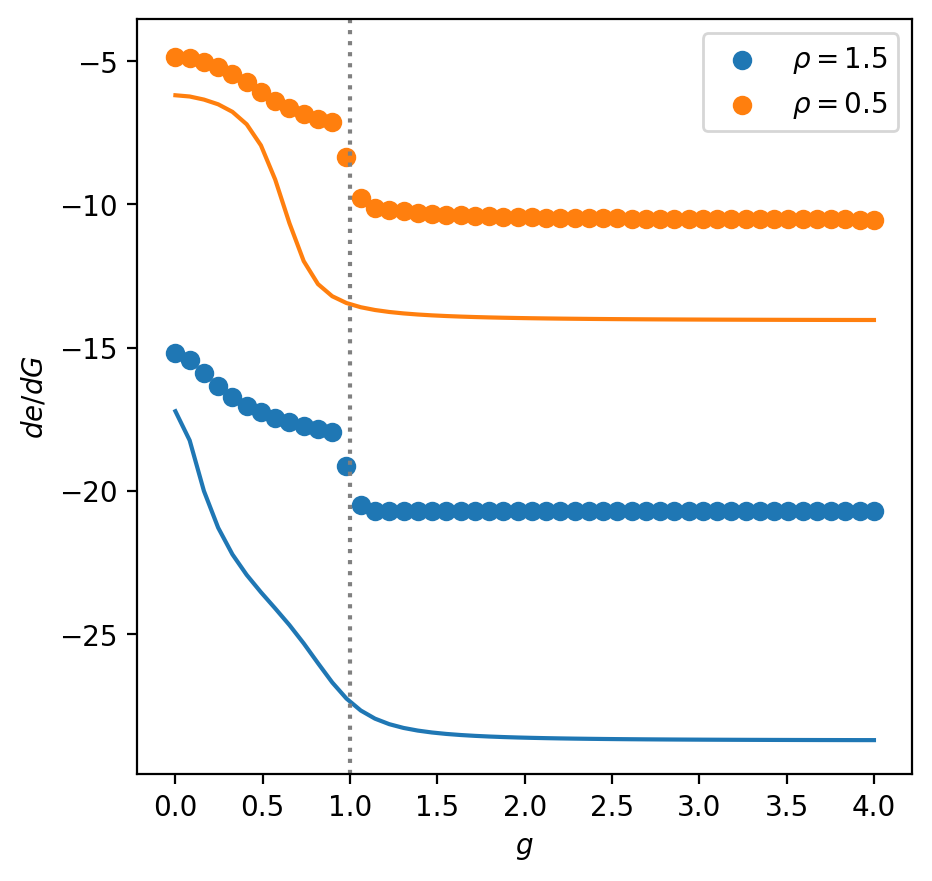

In [17]:
plt.figure(figsize=(5,5), dpi=200)
plt.plot(Gs/Gc, np.gradient(eas_15, Gs))
plt.scatter(Gs/Gc, np.gradient(eps_15, Gs), label=r'$\rho = 1.5$')
plt.plot(Gs/Gc, np.gradient(eas_05, Gs))
plt.scatter(Gs/Gc, np.gradient(eps_05, Gs), label=r'$\rho = 0.5$')
plt.xlabel(r'$g$')
plt.ylabel(r'$de/dG$')
plt.axvline(1, ls=':', color='gray')

plt.legend()
plt.savefig('periodic_antiperiodic_energies.png')

# SU(2) Hamiltonian with density-density interactions

In [16]:
def su2_anti(l, G, basis): # SU2 spinless fermion hamiltonian
    k = np.pi*np.arange(-2*l+1, 2*l, 2)/(2*l)
    eta = np.abs(k)
    L = 2*l
    # k should include positive and negative values
    kin_e = [[eta[ki], ki] for ki in range(L)]
    pairing = [] # c_k^+ c_-k^+ c_-k' c_k'
    dens_dens = [] # n_k n_k'
    
    for k1 in range(L):
        for k2 in range(L):
            Vkk = -G*eta[k1]*eta[k2]
            dens_dens += [[.5*Vkk, k1, k2]
                         ]
            if k1 >= l and k2 >= l:
                mk1 = L-k1-1
                mk2 = L-k2-1
                pairing += [[2*Vkk, k1, mk1, mk2, k2]]
            
    static = [['n', kin_e],
              ['++--', pairing], # ['--++', pairing],
              ['nn', dens_dens]
                ]
    return quantum_operator({'static': static}, basis=basis, check_herm=False, check_pcon=False,
                            check_symm=False)

def su2_peri(l, G, basis, full=False): # SU2 spinless fermion hamiltonian
    # Arrangement: k = (Pi/L)[-L, -L+2, ..., -2, 0, 2, ..., L-2]
    k = np.pi*np.arange(-2*l, 2*l, 2)/(2*l)
    eta = np.abs(k)
    L = 2*l
    # k should include positive and negative values
    kin_e = [[eta[ki], ki] for ki in range(L)]
    pairing = [] # c_k^+ c_-k^+ c_-k' c_k'
    dens_dens = [] # n_k n_k'
    if not full:
        eta[0] = 0 # cancels out all interactions for the k=-pi site
    for k1 in range(L):
        for k2 in range(L):
            Vkk = -G*eta[k1]*eta[k2]
            dens_dens += [[.5*Vkk, k1, k2]
                         ]
            if k1 >= l and k2 >= l:
                mk1 = L-k1-1
                mk2 = L-k2-1
                pairing += [[2*Vkk, k1, mk1, mk2, k2]]
            
    static = [['n', kin_e],
                ['++--', pairing], # ['--++', pairing],
                ['nn', dens_dens]
                ]
    return quantum_operator({'static': static}, basis=basis, check_herm=False, check_pcon=False,
                            check_symm=False)
